## CASE STUDY - Visualizations in Python on Sales Data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
SalesData = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\Case Study 4 - Python Visualizations Case Study\SalesData.csv")

In [3]:
SalesData

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [4]:
SalesData.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [5]:
SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [6]:
SalesData.describe()      # 5-point summary

,AccountId,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
count,3.709000e+03,3709.000000,3709.000000,3709.000000,3709.00000,3709.000000,3709.000000
mean,7.716535e+04,6134.912371,7998.039527,2.293567,3.00791,1.067396,1.242354
std,2.417615e+05,9195.070153,11130.551032,3.659052,4.31373,0.211269,0.192727
min,1.116000e+03,-11053.440000,-59090.810000,-3.000000,-17.00000,0.700000,0.910000
25%,3.774000e+03,0.000000,1886.690000,0.000000,1.00000,0.880000,1.080000
50%,6.500000e+03,3128.340000,3918.770000,1.000000,1.83330,1.070000,1.240000
75%,1.041900e+04,7837.540000,10122.400000,3.000000,4.00000,1.250000,1.410000
max,1.219499e+06,145760.120000,168033.360000,53.000000,61.00000,1.420000,1.570000


In [7]:
SalesData.describe(include="all")       # 5-point summary

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
count,3.709000e+03,3709,3709,3709,3709,3709,3709,3709,3709.000000,3709.000000,3709.000000,3709.00000,3709.000000,3709.000000
unique,NaN,2293,3,26,203,44,4,12,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Account98,Central,HAILSTORM,FAYETTEVILLE,TX,High,Jan,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,1374,206,40,333,1984,328,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.716535e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6134.912371,7998.039527,2.293567,3.00791,1.067396,1.242354
std,2.417615e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9195.070153,11130.551032,3.659052,4.31373,0.211269,0.192727
min,1.116000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11053.440000,-59090.810000,-3.000000,-17.00000,0.700000,0.910000
25%,3.774000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1886.690000,0.000000,1.00000,0.880000,1.080000
50%,6.500000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3128.340000,3918.770000,1.000000,1.83330,1.070000,1.240000
75%,1.041900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7837.540000,10122.400000,3.000000,4.00000,1.250000,1.410000


In [8]:
SalesData.isnull().sum()              #Checking if their null or missing values

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

In [9]:
SalesData.duplicated()           #Checking Duplicate Records

0       False
1       False
2       False
3       False
4       False
        ...  
3704    False
3705    False
3706    False
3707    False
3708    False
Length: 3709, dtype: bool

### 1. Compare Sales by region for 2016 with 2015 using bar char

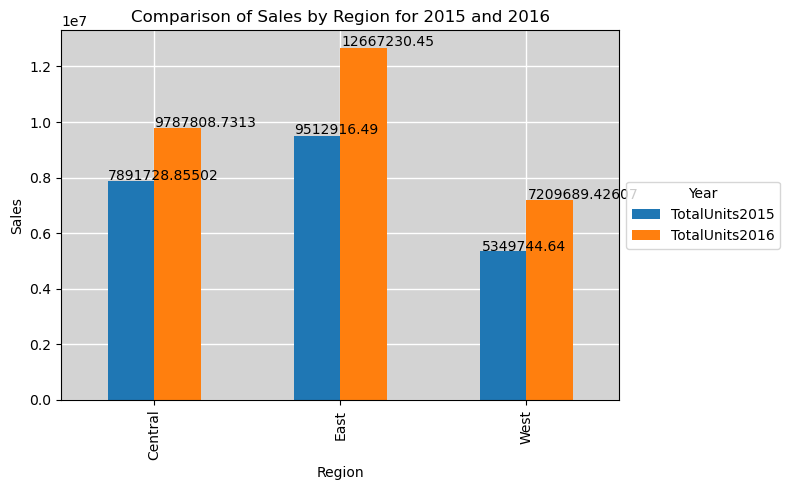

In [10]:
# Aggregate sales by region for 2015 and 2016
sales_by_region = SalesData.groupby('Region')[['Sales2015', 'Sales2016']].sum()

# Create a bar chart to compare sales by region for 2015 and 2016
ax = sales_by_region.plot(kind='bar', figsize=(8, 5))

plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Comparison of Sales by Region for 2015 and 2016')

# Change the legend labels, place it outside the plot, and add a title
ax.legend(["TotalUnits2015", "TotalUnits2016"], bbox_to_anchor=(1, 0.5), loc='center left', title='Year')

# Add grid lines
plt.grid(True, which='both', color='white', linewidth=1)

# Set the background color of the plot to lightgray
ax.set_facecolor('lightgray')

# Bring grid lines to the back
ax.set_axisbelow(True)

# Adding the sales values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

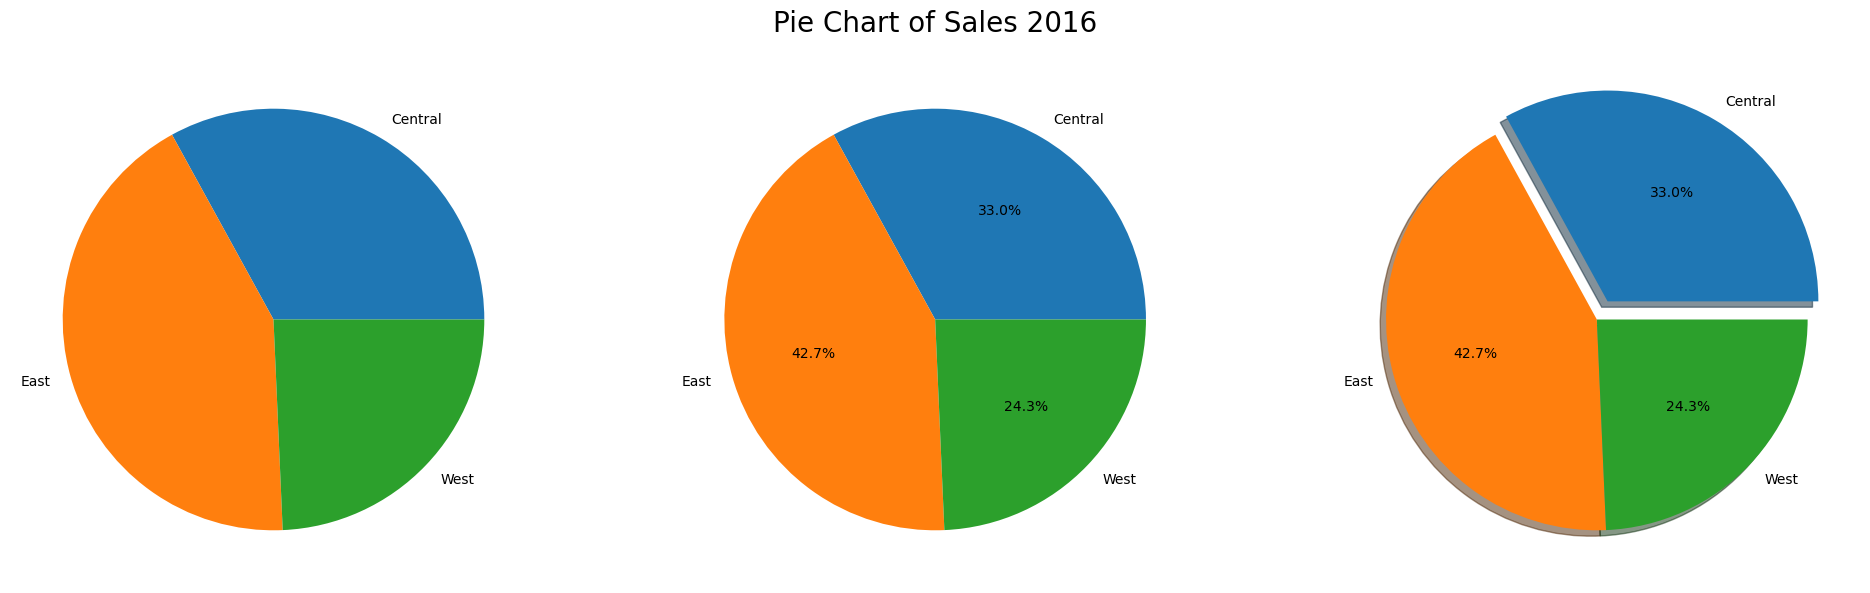

In [11]:
# Aggregate sales by region for 2016
sales_by_region_2016 = SalesData.groupby('Region')['Sales2016'].sum()

# Create a pie chart to visualize the sales by region for 2016
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# title for all charts
plt.suptitle('Pie Chart of Sales 2016', fontsize=20)

# Pie chart 1: Sales by Region
axs[0].pie(sales_by_region_2016, labels = sales_by_region_2016.index)

# Pie chart 2: Sales by Region with percentages
axs[1].pie(sales_by_region_2016, labels = sales_by_region_2016.index, autopct='%1.1f%%')

# Pie chart 3: Exploded 3D Pie chart
explode = (0.1, 0, 0)  
axs[2].pie(sales_by_region_2016, labels = sales_by_region_2016.index, autopct='%1.1f%%', shadow=True, explode=explode)

plt.tight_layout()
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

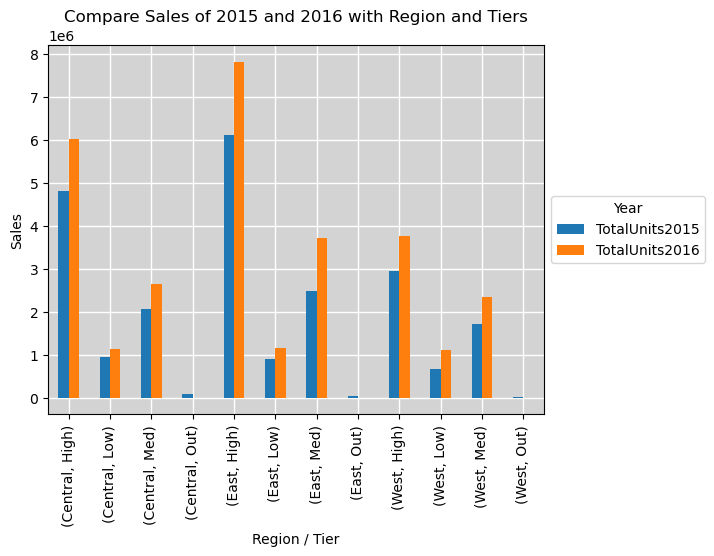

In [12]:
# Group the data by Region and Tier and calculate the sum of sales for each year
grouped_data = SalesData.groupby(['Region', 'Tier'])['Sales2015', 'Sales2016'].sum().reset_index()

# Pivot the DataFrame to get Regions and Tiers on the x-axis and sales data for each year as separate columns
pivot_df = grouped_data.pivot_table(values=['Sales2015','Sales2016'], index=['Region','Tier'])

# Plot stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=False)

# Set the title and labels
plt.title('Compare Sales of 2015 and 2016 with Region and Tiers')
plt.ylabel('Sales')
plt.xlabel('Region / Tier')

# Change the legend labels
ax.legend(["TotalUnits2015", "TotalUnits2016"], bbox_to_anchor=(1, 0.5), loc='center left', title='Year')

# Add grid lines
plt.grid(True, which='both', color='white', linewidth=1)

# Set the background color of the plot to lightgray
ax.set_facecolor('lightgray')

# Bring grid lines to the back
ax.set_axisbelow(True)

plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In the East region, the following state(s) registered a decline in sales in 2016:
10    NY
Name: State, dtype: object


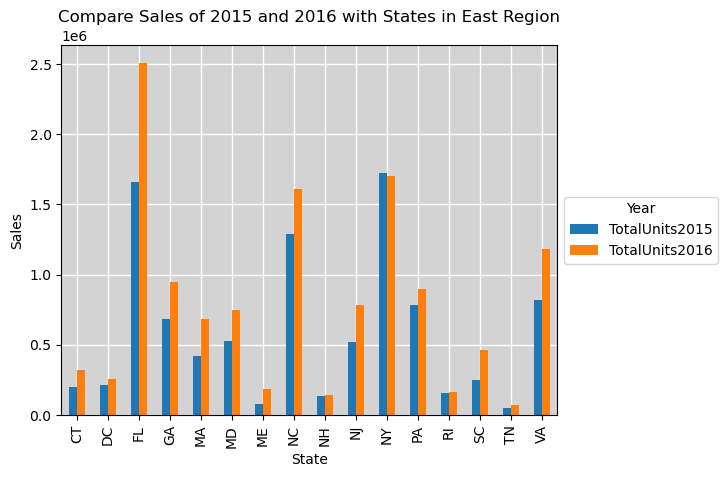

In [13]:
# Filter the data for the East region
east_data = SalesData[SalesData['Region'] == 'East']

# Group the data by State and calculate the sum of sales for each year
grouped_data = east_data.groupby(['State'])['Sales2015', 'Sales2016'].sum().reset_index()

# Find states where sales declined in 2016
declined_states = grouped_data[grouped_data['Sales2016'] < grouped_data['Sales2015']]['State']

print('In the East region, the following state(s) registered a decline in sales in 2016:')
print(declined_states)

# Plot stacked bar chart
ax = grouped_data.plot(x='State', y=['Sales2015', 'Sales2016'], kind='bar', stacked=False)

# Set the title and labels
plt.title('Compare Sales of 2015 and 2016 with States in East Region')
plt.ylabel('Sales')
plt.xlabel('State')

# Change the legend labels
ax.legend(["TotalUnits2015", "TotalUnits2016"], bbox_to_anchor=(1, 0.5), loc='center left', title='Year')

# Add grid lines
plt.grid(True, which='both', color='white', linewidth=1)

# Set the background color of the plot to lightgray
ax.set_facecolor('lightgray')

# Bring grid lines to the back
ax.set_axisbelow(True)

plt.show()

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

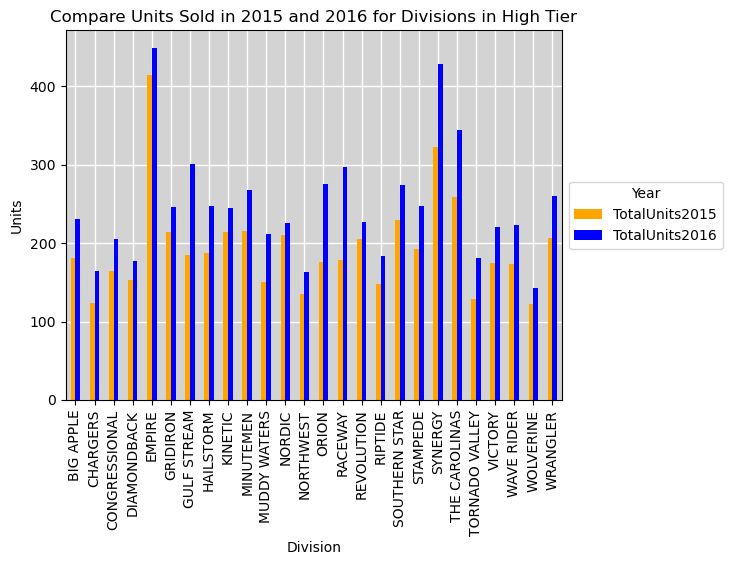

In [14]:
# Filter the data for the High tier
high_tier_data = SalesData[SalesData['Tier'] == 'High']

# Group the data by Division and calculate the sum of units sold for each year
grouped_data = high_tier_data.groupby(['Division'])['Units2015', 'Units2016'].sum().reset_index()

# Plot stacked bar chart
ax = grouped_data.plot(x='Division', y=['Units2015', 'Units2016'], kind='bar', stacked=False, color=['orange', 'blue'])

# Set the title and labels
plt.title('Compare Units Sold in 2015 and 2016 for Divisions in High Tier')
plt.ylabel('Units')
plt.xlabel('Division')

# Change the legend labels
ax.legend(["TotalUnits2015", "TotalUnits2016"], bbox_to_anchor=(1, 0.5), loc='center left', title='Year')

# Add grid lines
plt.grid(True, which='both', color='white', linewidth=1)

# Set the background color of the plot to lightgray
ax.set_facecolor('lightgray')

# Bring grid lines to the back
ax.set_axisbelow(True)

plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as - • Jan - Mar : Q1 ;  • Apr - Jun : Q2 ;  • Jul - Sep : Q3 ;  • Oct - Dec : Q4 

In [15]:
# Define the conditions for each quarter
conditions = [
    (SalesData['Month'].isin(['Jan', 'Feb', 'Mar'])),
    (SalesData['Month'].isin(['Apr', 'May', 'Jun'])),
    (SalesData['Month'].isin(['Jul', 'Aug', 'Sep'])),
    (SalesData['Month'].isin(['Oct', 'Nov', 'Dec']))
]

# Define the quarter labels
labels = ['Q1', 'Q2', 'Q3', 'Q4']
    
# Create the new 'Qtr' column
SalesData['Qtr'] = np.select(conditions, labels)

In [16]:
SalesData

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

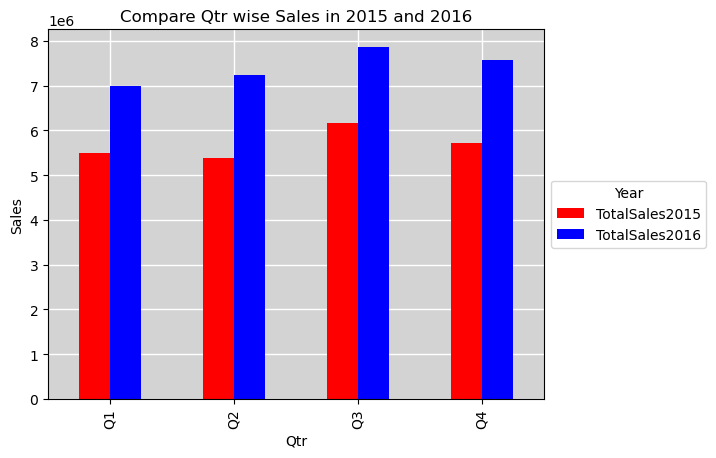

In [17]:
# Group the data by Qtr and calculate the sum of sales for each year
grouped_data = SalesData.groupby(['Qtr'])['Sales2015', 'Sales2016'].sum().reset_index()

# Plot stacked bar chart
ax = grouped_data.plot(x='Qtr', y=['Sales2015', 'Sales2016'], kind='bar', stacked=False, color=['red', 'blue'])

# Set the title and labels
plt.title('Compare Qtr wise Sales in 2015 and 2016')
plt.ylabel('Sales')
plt.xlabel('Qtr')

# Change the legend labels
ax.legend(["TotalSales2015", "TotalSales2016"], bbox_to_anchor=(1, 0.5), loc='center left', title='Year')

# Add grid lines
plt.grid(True, which='both', color='white', linewidth=1)

# Set the background color of the plot to lightgray
ax.set_facecolor('lightgray')

# Bring grid lines to the back
ax.set_axisbelow(True)

plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.(Draw 4 pie charts representing a Quarter for each Tier)

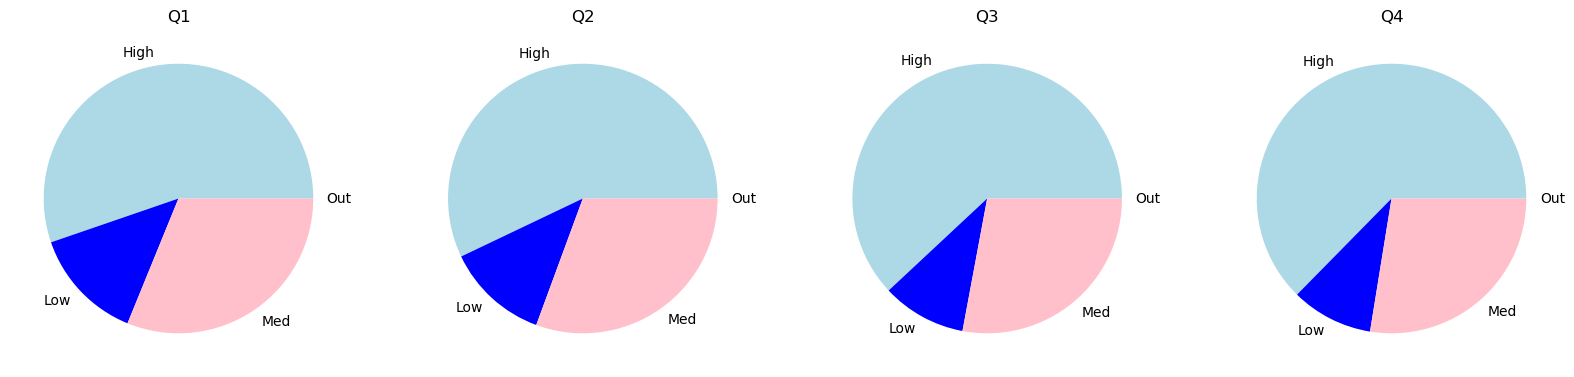

In [18]:
# Group the data by Qtr and Tier and calculate the sum of sales for each year
grouped_data = SalesData.groupby(['Qtr', 'Tier'])['Sales2016'].sum().reset_index()

# Replace negative sales with 0
grouped_data['Sales2016'] = grouped_data['Sales2016'].clip(lower=0)

# Create a figure with 4 subplots (one for each quarter)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Define the colors for each Tier
colors = {'High': 'lightblue', 'Med': 'pink', 'Low': 'blue', 'Out': 'orange'}

# Create a pie chart for each quarter
for i, qtr in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    data = grouped_data[grouped_data['Qtr'] == qtr]
    axs[i].pie(data['Sales2016'], labels=data['Tier'], colors=[colors[tier] for tier in data['Tier']])
    axs[i].set_title(qtr)

plt.show()